# Метод главных компонент

$$
Q(a_0,a_1,\dots,a_m) = \sum_{k=1}^N \left( 
\|x_k - a_0\| - \sum_{j=1}^m (a_j, x_k - a_0)^2 \right)
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.printoptions(precision=3)

In [2]:
df = pd.read_csv("data/starsCYG.csv", sep=',')
df

,id,log.Te,log.light
0,1,4.37,5.23
1,2,4.56,5.74
2,3,4.26,4.93
3,4,4.56,5.74
4,5,4.30,5.19
5,6,4.46,5.46
6,7,3.84,4.65
7,8,4.57,5.27
8,9,4.26,5.57
9,10,4.37,5.12


In [3]:
X1 = df['log.Te'].values
X2 = df['log.light'].values
X = np.c_[X1, X2]
print(X)

[[4.37 5.23]
 [4.56 5.74]
 [4.26 4.93]
 [4.56 5.74]
 [4.3  5.19]
 [4.46 5.46]
 [3.84 4.65]
 [4.57 5.27]
 [4.26 5.57]
 [4.37 5.12]
 [3.49 5.73]
 [4.43 5.45]
 [4.48 5.42]
 [4.01 4.05]
 [4.29 4.26]
 [4.42 4.58]
 [4.23 3.94]
 [4.42 4.18]
 [4.23 4.18]
 [3.49 5.89]
 [4.29 4.38]
 [4.29 4.22]
 [4.42 4.42]
 [4.49 4.85]
 [4.38 5.02]
 [4.42 4.66]
 [4.29 4.66]
 [4.38 4.9 ]
 [4.22 4.39]
 [3.48 6.05]
 [4.38 4.42]
 [4.56 5.1 ]
 [4.45 5.22]
 [3.49 6.29]
 [4.23 4.34]
 [4.62 5.62]
 [4.53 5.1 ]
 [4.45 5.22]
 [4.53 5.18]
 [4.43 5.57]
 [4.38 4.62]
 [4.45 5.06]
 [4.5  5.34]
 [4.45 5.34]
 [4.55 5.54]
 [4.45 4.98]
 [4.42 4.5 ]]


In [4]:
N = len(X)
(N-6)/N

0.8723404255319149

In [5]:
c0 = np.mean(X, axis=0)
print(c0)

[4.31       5.01212766]


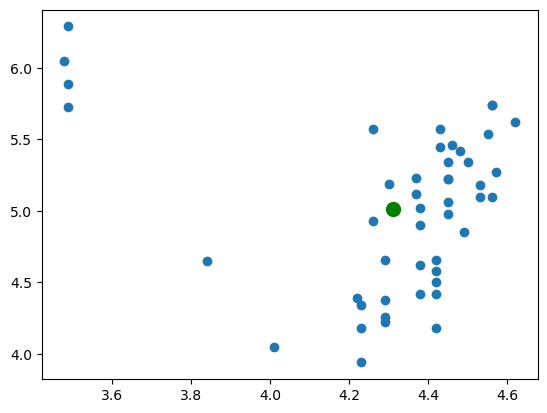

In [6]:
plt.scatter(X1, X2)
plt.scatter([c0[0]], [[c0[1]]], c='g', s=100)
plt.show()

In [7]:
Z = X - c0
U = Z * Z
R = U.sum(axis=1)

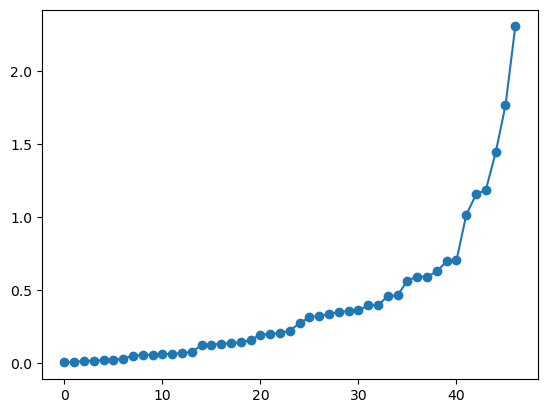

In [8]:
plt.plot(sorted(R), marker='o')
plt.show()

$$
Q(a) = \frac 1 N \sum_{k=1}^N \|x_k-a\|^2
$$

$$
Q(a) = \mathsf{M} \{\|x_1-a\|^2, \dots, \|x_N-a\|^2\}
$$

$$
\mathsf{M}_\rho \{ z_1,\dots,z_N\} = \arg\min_u\sum_{k=1}^N \rho(z_k-u)
$$

$$
\rho(r) = \sqrt{\varepsilon^2+r^2} - \varepsilon
$$

$$
\rho_\alpha(r) = \left\{
\begin{array}{ll}
\alpha\rho(r), &  \mathrm{если}\  r\geq0\\
(1-\alpha)\rho(r), &  \mathrm{если}\ r<0\\
\end{array}
\right.
$$

$$
\mathsf{WM}_\alpha \{z_1,\dots,z_N\} = \frac 1 N \sum_{k=1}^N
\min(z_k, \bar z_\alpha )
$$

$$
\bar z_\alpha = \mathsf{M}_{\rho_\alpha} \{z_1,\dots, z_N\}
$$

$$
\nabla Q(a) = \sum_{k=1}^N v_k(a) (x_k - a),
$$
где
$$
v_k(a)=\frac{\partial \mathsf{M}}{\partial z_k}
(z_1,\dots, z_N),\qquad z_k = \|x_k - a\|^2
$$


$$
a^{t+1} = \sum_{k=1}^N v_k(a^t) x_k
$$

In [23]:
def find_center(X, qf, n_iter=100, tol=1.0e-8):
    a = a_min = X.mean(axis=0)
    U = X - a
    Z = (U * U).sum(axis=1)
    S = S_min = qf.evaluate(Z)
    G = qf.gradient(Z)
    # print(S, a)
    SS = [S]

    for K in range(n_iter):
        S0 = S
        a = X.T @ G

        U = X - a
        Z = (U * U).sum(axis=1)

        S = qf.evaluate(Z)
        G = qf.gradient(Z)
        SS.append(S)

        if S < S_min:
            S_min = S
            a_min = a

        if K > 0 and abs(S - S0) < tol:
            break

    return a_min, SS

In [ ]:
plt.

In [10]:
from funcs import SoftQuantileFunc, SoftAbs
from aggfuncs import WMMean, MMean

In [11]:
rho_a = SoftQuantileFunc(SoftAbs(0.01), 0.84)
wma = WMMean(rho_a)

In [12]:
c1, SS = find_center(X, wma)

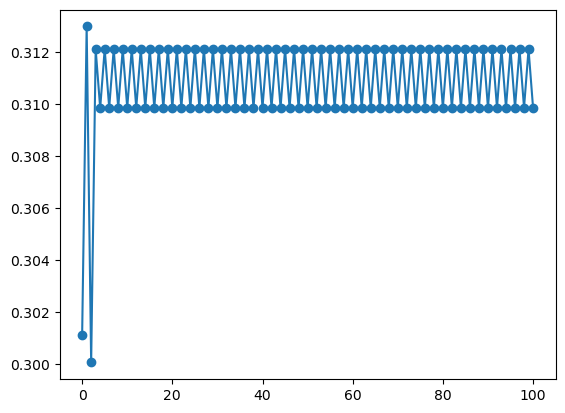

In [13]:
plt.plot(SS, marker='o')
plt.show()

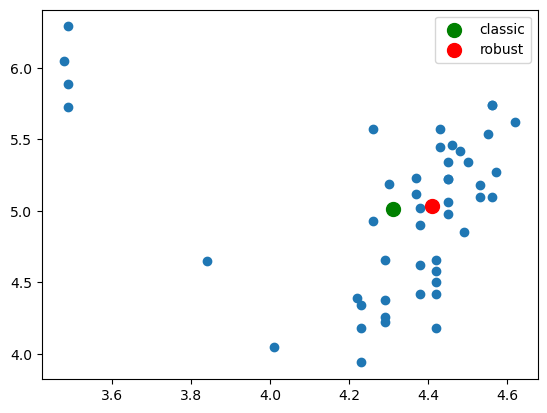

In [14]:
plt.scatter(X1, X2)
plt.scatter([c0[0]], [[c0[1]]], c='g', s=100, label='classic')
plt.scatter([c1[0]], [[c1[1]]], c='r', s=100, label='robust')
plt.legend()
plt.show()

$$
x_k\to x_k - c
$$

$$
Q(a) = \sum_{k=1}^N \left(\|x_k\|^2 - (x_k,a)^2\right)
$$
$$
\|a\|^2=1
$$

Метод множителей Лагранжа:

$$
Q(a,\lambda) = \lambda(\|a\|^2-1) + \sum_{k=1}^N \left(\|x_k\|^2 - (x_k,a)^2\right)
$$

$$
S a = \lambda a
$$
$$
S = X^\top X
$$

$$
a^\top Sa = \lambda (a,a)
$$

$$
S = \frac {1} {N}\sum_{k=1}^N x_k\otimes x_k
$$

$$
\lambda^{t+1}=\frac{a^{\top t}Sa^t}{(a^t,a^t)}
$$

$$
a^{t+1} = \frac{1}{\lambda^t} Sa^t
$$

$$
Q(a,\lambda) = \lambda(\|a\|^2-1) + M\{ ...,\|x_k\|^2 - (x_k,a)^2 ,...\}
$$

$$
\frac{\partial Q}{\partial a} = 2\lambda a - 2\sum_{k=1}^N \frac {\partial M}{\partial z_k}x_k\otimes x_k a
$$

$z_k = \|x_k\|^2 - (x_k,a)^2$

$$
S = \sum_{k=1}^N \frac {\partial M}{\partial z_k}x_k\otimes x_k
$$

$$
S a = \lambda a
$$

In [24]:
X1_0 = X - c0
X1 = X - c1

In [46]:
def find_pc(X, n_iter=100, tol=1.0e-8, verbose=False):
    L = L_min = 1.
    a = X[0]
    X2 = (X * X).sum(axis=1)
    U = X @ a
    U2 = U * U
    Z = X2 - U2
    Q = Q_min = Z.sum()
    QQ = [Q]
    
    S = X.T @ X
    for K in range(n_iter):
        Q0 = Q
        L1 = ((a @ S) @ a) / (a @ a)
        a1 = (S @ a) / L1
        a1 = a1 / np.sqrt(a1 @ a1)

        U = X @ a1
        Z = X2 - U * U
        Q = Z.sum()
        
        if Q < Q_min:
            Q_min = Q
            a_min = a1
            L_min = L1
            if verbose:
                print('*', Q, L1, a1)

        if np.max(np.abs(a1 - a)) < tol:
            break

        a = a1
        
    return a_min, L_min

In [47]:
def find_robust_pc(X, qf, n_iter=100, tol=1.0e-8, verbose=False):
    L = L_min = 1.
    a = X[0]
    X2 = (X * X).sum(axis=1)
    U = X @ a
    U2 = U * U
    Z = X2 - U2
    Q = Q_min = qf.evaluate(Z)
    G = qf.gradient(Z)
    QQ = [Q]
    
    for K in range(n_iter):
        S = (X.T * G) @ X
        Q0 = Q
        L1 = ((a @ S) @ a) / (a @ a)
        a1 = (S @ a) / L1
        a1 = a1 / np.sqrt(a1 @ a1)

        U = X @ a1
        Z = X2 - U * U
        Q = qf.evaluate(Z)
        G = qf.gradient(Z)
        
        if Q < Q_min:
            Q_min = Q
            a_min = a1
            L_min = L1
            if verbose:
                print('*', Q, L1, a1)

        if np.max(np.abs(a1 - a)) < tol:
            break

        a = a1
        
    return a_min, L_min
        

In [51]:
a1_0, L1_0 = find_pc(X1)
a1_0

array([-0.13718465,  0.99054549])

In [50]:
a1, L1 = find_robust_pc(X1, wma)
a1

array([0.14957064, 0.98875104])

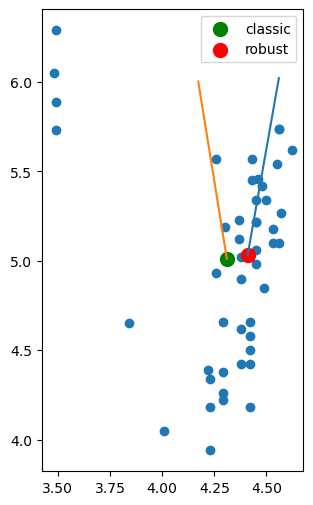

In [52]:
plt.figure(figsize=(6/(16/9),6))
plt.scatter(X[:,0], X[:,1])
plt.scatter([c0[0]], [[c0[1]]], c='g', s=100, label='classic')
plt.scatter([c1[0]], [[c1[1]]], c='r', s=100, label='robust')
plt.plot([c1[0], c1[0]+a1[0]], [c1[1], c1[1]+a1[1]])
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]])
plt.legend()
plt.show()

In [56]:
XA = np.array([xa * a1 for xa in X1 @ a1])
X2 = X1 - XA

In [57]:
XA = np.array([xa * a1_0 for xa in X1_0 @ a1_0])
X2_0 = X1_0 - XA

In [66]:
a2_0, L2_0 = find_pc(X2_0)
print(a2_0)

[0.99054549 0.13718465]


In [67]:
a2, L2 = find_robust_pc(X2, wma)
print(a2)

[-0.98875104  0.14957064]


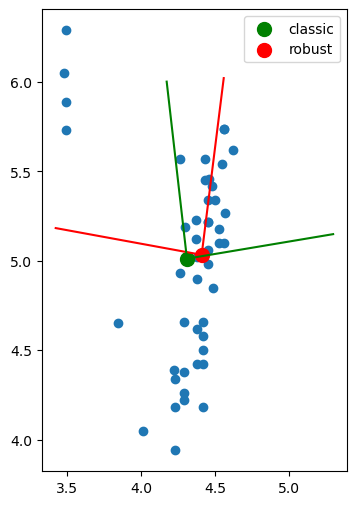

In [71]:
plt.figure(figsize=(7/(16/9),6))
plt.scatter(X[:,0], X[:,1])
plt.scatter([c0[0]], [[c0[1]]], c='g', s=100, label='classic')
plt.scatter([c1[0]], [[c1[1]]], c='r', s=100, label='robust')
plt.plot([c1[0], c1[0]+a1[0]], [c1[1], c1[1]+a1[1]], color='r')
plt.plot([c1[0], c1[0]+a2[0]], [c1[1], c1[1]+a2[1]], color='r')
plt.plot([c0[0], c0[0]+a1_0[0]], [c0[1], c0[1]+a1_0[1]], color='g')
plt.plot([c0[0], c0[0]+a2_0[0]], [c0[1], c0[1]+a2_0[1]], color='g')
plt.legend()
plt.show()